# Random Order- and SKU generators

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skewnorm
from datetime import datetime
from scipy.stats import pareto

%matplotlib inline

---

## Random SKU table generation

### Objectives
Generate a table with unique SKUs that have randomly generated values. The number of records can be chosen by the user.

The initial table must contain at minimum the following columns:

| SKU ID | Category | Length | Width | Height | Weight |
| ---- | ---- | ---- | ---- | ---- | ---- |
| categorical | categorical | numerical | numerical | numerical | numerical |

Goals in detail:
- Develop basic method to generate a table of randomly created SKUs with the above features

In [3]:
df_products = pd.read_excel('Product_list.xls')
df_products

,Category,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
0,Shirt,350,375,400,200,220,250,10,12,15
1,Pants,400,450,500,250,275,300,15,18,21
2,Socks,100,110,120,75,77,80,5,5,5
3,Box of cereals,250,250,250,150,150,150,10,10,10
4,Can of tuna,110,110,110,110,110,110,7,7,7
5,Bag of rice,540,540,540,350,350,350,250,250,250
6,Toolbox,600,600,600,380,380,380,350,350,350
7,Box of nails,150,150,150,120,120,120,80,80,80
8,Glue gun,380,380,380,80,80,80,80,80,80


In [4]:
df_products.set_index('Category', inplace=True)
df_products

,Length_S,Length_M,Length_L,Width_S,Width_M,Width_L,Height_S,Height_M,Height_L
Category,,,,,,,,,
Shirt,350,375,400,200,220,250,10,12,15
Pants,400,450,500,250,275,300,15,18,21
Socks,100,110,120,75,77,80,5,5,5
Box of cereals,250,250,250,150,150,150,10,10,10
Can of tuna,110,110,110,110,110,110,7,7,7
Bag of rice,540,540,540,350,350,350,250,250,250
Toolbox,600,600,600,380,380,380,350,350,350
Box of nails,150,150,150,120,120,120,80,80,80
Glue gun,380,380,380,80,80,80,80,80,80


In [5]:
df_products.loc['Can of tuna']['Length_S']

110

In [6]:
def random_skus(articles, vertical):
    '''Function to generate a SKU table
    Inputs:
    - Number of desired SKUs
    - Market sector (vertical)
    Outputs:
    - SKU table'''
    
    random_dict = {}
    for i in range(1, articles + 1, 1):
        if vertical == 'Fashion':
            category = np.random.choice(['Shirt', 'Pants', 'Socks'])
            size = np.random.choice(['S', 'M', 'L'])
            length = abs(round(np.random.normal(df_products.loc[category]['Length_' + size], 10, 1)[0],0))
            width = abs(round(np.random.normal(df_products.loc[category]['Width_' + size], 7, 1)[0],0))
            height = abs(round(np.random.normal(df_products.loc[category]['Height_' + size], 5, 1)[0],0))
        elif vertical == 'Food':
            category = np.random.choice(['Box of cereals', 'Can of tuna', 'Bag of rice'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']
        else:
            category = np.random.choice(['Toolbox', 'Box of nails', 'Glue gun'])
            length = df_products.loc[category]['Length_S']
            width = df_products.loc[category]['Width_S']
            height = df_products.loc[category]['Height_S']

        size = np.random.choice(['S', 'M', 'L'])
        random_dict[i] = ['SKU_'+str(i), category, size, length, width, height]

    random_list = pd.DataFrame.from_dict(
        random_dict,
        orient='index',
        columns=['SKU', 'Category', 'Size', 'Length', 'Width', 'Height'])

    return random_list

In [7]:
df_skus_fashion = random_skus(1000, 'Fashion')

In [8]:
df_skus_fashion

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Shirt,L,356.0,202.0,14.0
2,SKU_2,Socks,M,119.0,83.0,3.0
3,SKU_3,Pants,S,517.0,301.0,29.0
4,SKU_4,Shirt,M,375.0,207.0,16.0
5,SKU_5,Socks,L,118.0,79.0,11.0
...,...,...,...,...,...,...
996,SKU_996,Socks,S,122.0,79.0,8.0
997,SKU_997,Shirt,M,381.0,219.0,19.0
998,SKU_998,Pants,S,447.0,275.0,19.0
999,SKU_999,Socks,M,104.0,84.0,1.0


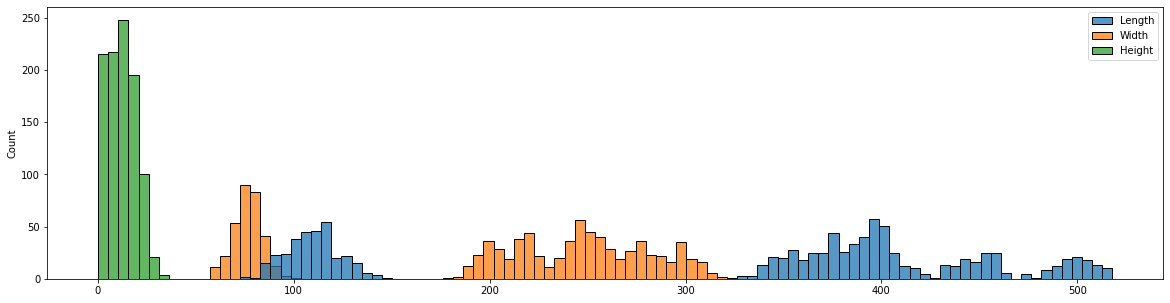

In [9]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_fashion[['Length', 'Width', 'Height']], bins=100);

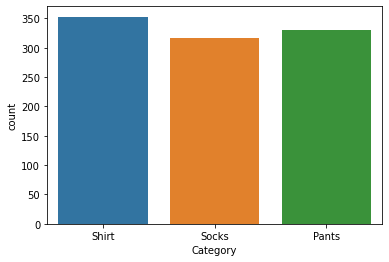

In [10]:
# Visual check if distribution appears uniform random
sns.countplot(x=df_skus_fashion['Category']);

In [11]:
df_skus_fashion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SKU       1000 non-null   object 
 1   Category  1000 non-null   object 
 2   Size      1000 non-null   object 
 3   Length    1000 non-null   float64
 4   Width     1000 non-null   float64
 5   Height    1000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 87.0+ KB


In [12]:
df_skus_fashion.describe()

,Length,Width,Height
count,1000.000000,1000.000000,1000.000000
mean,315.512000,193.767000,12.039000
std,145.906369,84.565632,7.021879
min,74.000000,59.000000,0.000000
25%,120.000000,82.000000,7.000000
50%,376.000000,220.000000,12.000000
75%,410.250000,258.250000,17.000000
max,518.000000,317.000000,36.000000


In [13]:
df_skus_food = random_skus(1000, 'Food')
df_skus_food

,SKU,Category,Size,Length,Width,Height
1,SKU_1,Box of cereals,L,250,150,10
2,SKU_2,Box of cereals,L,250,150,10
3,SKU_3,Bag of rice,S,540,350,250
4,SKU_4,Bag of rice,M,540,350,250
5,SKU_5,Can of tuna,S,110,110,7
...,...,...,...,...,...,...
996,SKU_996,Box of cereals,M,250,150,10
997,SKU_997,Can of tuna,M,110,110,7
998,SKU_998,Box of cereals,M,250,150,10
999,SKU_999,Bag of rice,S,540,350,250


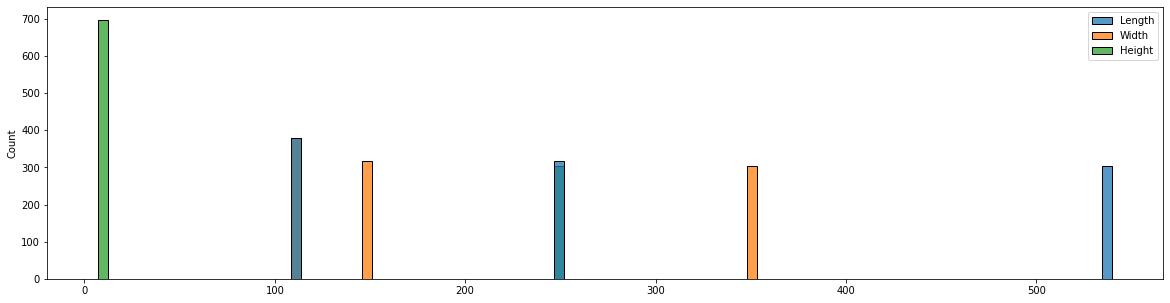

In [14]:
plt.figure(figsize=(20, 5))
sns.histplot(df_skus_food[['Length', 'Width', 'Height']], bins=100);

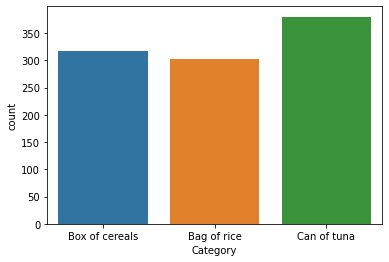

In [15]:
sns.countplot(x=df_skus_food['Category']);

### Notes
At this stage, the produced values are only to showcase the functionality and are not representative of real world data.
At a later time, more realistic data needs to be produced.

---

## Random order table generator

### Considerations
Like in most other ares in business, the SKU-velocity distribution in a typical order profil corresponds to an 80/20, or in some cases 70/30, ratio (20% of the SKUs representing 80% of the order volume.). Based on this, SKUs will belong to velocity classes (A, B, C), depending how fast they are moving. Therefore, the available SKUs need to be assigned orders in a way that follows this rule.

<img src="https://interlakemecalux.cdnwm.com/blog/img/80-20-pareto-principle.1.2.jpg" width="650"/>

There is a specific, somewhat business-specific, order profile (units per-order line and order lines per order).

Ultimately, there must be a seclection of order profiles that go in line with different market segments and business types.

### Objectives
The goal is to create a function that generates a table of random orders. The order profile (units per order line, order lines per order) as well as the volume distribution of the SKUs (Pareto principle) must represent a real live scenario and must be selectable by the user.

The initial table must contain at minimum the following columns:

| Date | Order ID | SKU ID | Quantity | Order category |
| ---- | ---- | ---- | ---- | ---- |
| numerical | categorical | categorical | numerical | categorical |

#### Steps in detail
1) Define range of days based on user input
2) Assign random number of orders to each day while assigning a number of order lines (SKUs) - for the beginning random, normal, right skewed
3) Develop method to randomly distribute SKUs across all orders - for the beginning randomly, based on 80/20 rule
4) Add quantities for each order line - for now random, normal
5) Putting all together

---
#### 1. Define range of days

In [16]:
def day_definer(num):
    '''
    Function to create a list of days. First day of range is current day
    Input:
    - Number of days
    Outbout:
    - List of days in the range of first day to last day
    '''

    return pd.date_range(datetime.today(), periods=num).date.tolist()

In [17]:
lst_days = day_definer(90)
lst_days

[datetime.date(2022, 1, 30),
 datetime.date(2022, 1, 31),
 datetime.date(2022, 2, 1),
 datetime.date(2022, 2, 2),
 datetime.date(2022, 2, 3),
 datetime.date(2022, 2, 4),
 datetime.date(2022, 2, 5),
 datetime.date(2022, 2, 6),
 datetime.date(2022, 2, 7),
 datetime.date(2022, 2, 8),
 datetime.date(2022, 2, 9),
 datetime.date(2022, 2, 10),
 datetime.date(2022, 2, 11),
 datetime.date(2022, 2, 12),
 datetime.date(2022, 2, 13),
 datetime.date(2022, 2, 14),
 datetime.date(2022, 2, 15),
 datetime.date(2022, 2, 16),
 datetime.date(2022, 2, 17),
 datetime.date(2022, 2, 18),
 datetime.date(2022, 2, 19),
 datetime.date(2022, 2, 20),
 datetime.date(2022, 2, 21),
 datetime.date(2022, 2, 22),
 datetime.date(2022, 2, 23),
 datetime.date(2022, 2, 24),
 datetime.date(2022, 2, 25),
 datetime.date(2022, 2, 26),
 datetime.date(2022, 2, 27),
 datetime.date(2022, 2, 28),
 datetime.date(2022, 3, 1),
 datetime.date(2022, 3, 2),
 datetime.date(2022, 3, 3),
 datetime.date(2022, 3, 4),
 datetime.date(2022, 3, 5),

#### 2. Assign random number of orders per day
Each day needs to get a number of orders assigned.

In [18]:
# Function to generate random oders for a given day

def order_generator(orders_per_day, avg_lines_order, order_std, min_order_size):

    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

In [19]:
test_orders = order_generator(1000, 30, 10, 3)

In [20]:
test_orders

array([44., 28., 39., 25., 38., 37., 29., 37., 29., 23., 34., 50., 41.,
       45., 23., 15., 14., 54., 29., 53., 36., 44., 25., 16., 41., 26.,
       22., 19., 54., 46., 39., 48., 34., 47., 37., 29., 34., 41., 44.,
        5., 31., 18., 28., 22., 38., 31., 24., 60., 36., 29., 35., 29.,
       23., 42., 41., 28., 52., 28., 23., 33., 12., 30., 11., 23., 35.,
       30., 40., 23., 33., 45., 16., 33., 36., 36., 32., 33., 45., 38.,
       29., 25., 50., 24., 40., 41., 40., 53., 42., 38., 31., 23., 39.,
       32., 34., 39., 19., 41., 27., 35., 37., 38., 30., 40., 29., 34.,
       30., 26., 40., 31., 30., 37., 49., 30., 41., 40., 33., 42., 43.,
       30., 45., 34., 14., 18., 30., 20., 43., 26., 41., 36., 44., 42.,
       31., 25., 34., 25., 19., 31., 37., 27., 22., 14., 25., 45., 28.,
       21., 36., 29., 37., 32., 23., 22., 45., 27., 35., 32., 33., 28.,
       20., 19., 23., 17., 24., 27., 25., 24., 35., 32., 26., 23., 35.,
       27., 34., 45., 46., 12., 39., 25., 31., 38., 50., 46., 42

(array([ 2.,  1.,  0.,  3.,  2.,  0.,  4.,  2.,  4.,  5.,  6.,  9.,  5.,
        10.,  8., 12., 13., 19., 21., 38., 32., 26., 29., 36., 25., 50.,
        44., 52., 27., 43., 36., 33., 43., 48., 38., 32., 21., 20., 27.,
        24., 14., 20., 21., 14., 10., 13., 14.,  6.,  7.,  7.,  9.,  1.,
         4.,  2.,  1.,  1.,  3.,  1.,  0.,  2.]),
 array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16.,
        17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
        30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
        56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 <BarContainer object of 60 artists>)

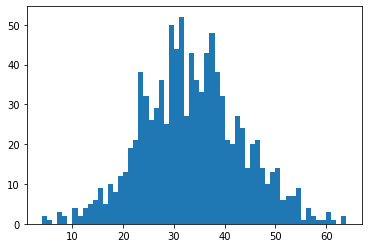

In [21]:
# Plot:
axis = np.arange(start=min(test_orders), stop = max(test_orders) + 1)
plt.hist(test_orders, bins = axis)

The number of orders per day is in this case 1000. This needs to be randomized as well when assigning orders for a range of days.

In [22]:
def order_generator(avg_orders_per_day, avg_lines_order, order_std, min_order_size):

    orders_per_day = np.round(abs(np.random.normal(loc=avg_orders_per_day, scale=50, size=1))).astype(int) # For simplicity, the standard deviation was set to 10
    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

In [23]:
test_orders = order_generator(1000, 30, 10, 3)

(array([ 1.,  0.,  0.,  5.,  2.,  2.,  3.,  3.,  4.,  7.,  8.,  2., 15.,
        11., 12., 21., 20., 25., 34., 19., 21., 24., 33., 35., 42., 38.,
        45., 45., 47., 45., 48., 30., 30., 37., 24., 28., 19., 27., 17.,
        17., 13., 13., 16., 10., 15.,  7.,  9.,  8.,  7.,  3.,  6.,  1.,
         1.,  2.,  1.,  1.,  2.,  2.,  1.,  1.]),
 array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
        18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
        31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
        44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
        57., 58., 59., 60., 61., 62., 63., 64., 65.]),
 <BarContainer object of 60 artists>)

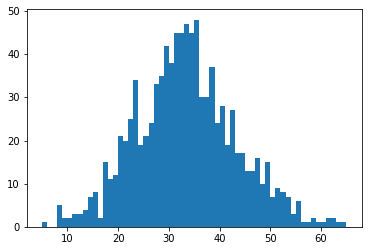

In [24]:
# Plot:
axis = np.arange(start=min(test_orders), stop = max(test_orders) + 1)
plt.hist(test_orders, bins = axis)

In [25]:
len(test_orders)

965

#### 3. Assigning SKUs
The assignment of SKUs may be random, but each SKU will need to have a different velocity, basically how often it is picked during the day. As stated, this distribution will follow the 80/20 rule of the pareto principle.

First, a pareto distribution of n SKUs with distinct values need to be produced. N is the number of SKUs, and the dependend values represent the number of order lines each SKU is picked during the day.
In the next step each SKU will then be translated to a unique identifier (SKU ID), multiplied by the number of order lines it produces during the day, and then be put into a SKU list. This SKU list represents a pool from which order lines can be randomly pulled when a procedure loops throuh all the orders. Because the appearance of SKUs in the list is varying (based on the pareto principle) probability will naturally reproduce the pareto distribution when the oder list is generated.

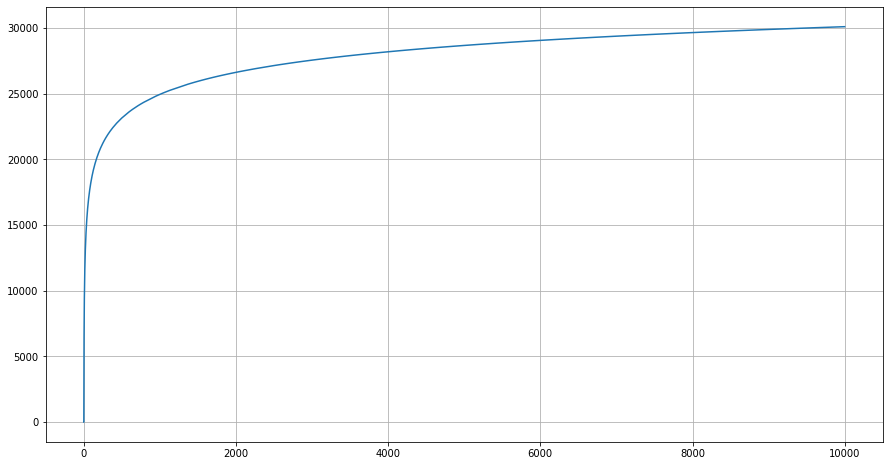

In [26]:
# Let's review the cumulative density function of the pareto distribution. We will use scipy's pareto library.
num_skus = 10000

x = np.arange(1, num_skus)

pareto_cdf = (pareto.cdf(x, b=0.1, loc=1, scale=1) * 50000).round()

plt.figure(figsize=(15, 8))
plt.plot(x, pareto_cdf)
plt.grid()
plt.show()

In [27]:
pareto_cdf.mean()

27881.72297229723

This distribution could represent a day in a distribution center. It is very steep in this example and shows how 10,000 SKUs adding adding up to 30,000 order lines. The fastest SKUs are on the left side of the X-axis and generate the biggest part of the order volume. We need the derivation of this function (probability density function) in order to directly get the individual impacts of each SKU.

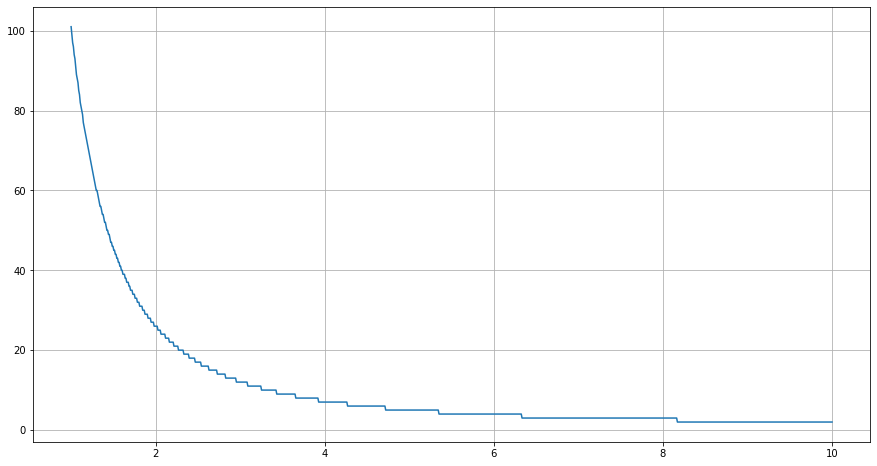

In [28]:
# Let's try spipy's pdf funtion
min_lines = 1
lines_range_factor = 100

x = np.linspace(1, 10, 1000)

pareto_pdf = (pareto.pdf(x, b=1, loc=0, scale=1) * lines_range_factor + min_lines).round()

plt.figure(figsize=(15, 8))
plt.plot(x, pareto_pdf)
plt.grid()
plt.show()

In [29]:
# Make a function that randomly creates a number of lines from that distribution:

def random_line_assigner(min_lines, lines_range_factor):
    return np.random.choice((pareto.pdf(x, b=1, loc=0, scale=1) * lines_range_factor + min_lines).round())

In [30]:
# generate 1000 samples for testing if distribution will be reflected
df_fashion_skus = df_skus_fashion = random_skus(1000, 'Fashion')

lst_lines = []

for i in range(len(df_fashion_skus)):
    lst_lines.append(int(random_line_assigner(1, 100)))

df_fashion_skus['Lines'] = lst_lines


In [31]:
df_fashion_skus

,SKU,Category,Size,Length,Width,Height,Lines
1,SKU_1,Pants,L,462.0,270.0,17.0,4
2,SKU_2,Socks,M,121.0,83.0,2.0,2
3,SKU_3,Socks,M,120.0,80.0,15.0,4
4,SKU_4,Pants,L,443.0,283.0,16.0,18
5,SKU_5,Socks,L,123.0,73.0,1.0,2
...,...,...,...,...,...,...,...
996,SKU_996,Socks,M,117.0,73.0,7.0,67
997,SKU_997,Socks,M,115.0,83.0,2.0,6
998,SKU_998,Socks,S,89.0,82.0,5.0,6
999,SKU_999,Shirt,L,355.0,196.0,4.0,2


In [32]:
# For the pareto distrubution to appear the dataframe needs to be sorted by the order lines and then a cumulative lines column needs to be added
# Sorting by velocity
df_fashion_skus.sort_values('Lines', ascending=False, inplace=True)
# Cumulate values
df_fashion_skus['Cumulative Lines'] = np.cumsum(df_fashion_skus['Lines'])
# Resetting index for the visualization
df_fashion_skus.reset_index(drop=True, inplace= True)

In [33]:
df_fashion_skus

,SKU,Category,Size,Length,Width,Height,Lines,Cumulative Lines
0,SKU_662,Pants,M,446.0,268.0,20.0,101,101
1,SKU_630,Pants,L,409.0,243.0,10.0,99,200
2,SKU_27,Socks,M,103.0,80.0,6.0,99,299
3,SKU_146,Socks,M,112.0,81.0,15.0,99,398
4,SKU_309,Shirt,M,382.0,214.0,13.0,99,497
...,...,...,...,...,...,...,...,...
995,SKU_180,Socks,L,117.0,78.0,10.0,2,11486
996,SKU_456,Shirt,S,399.0,245.0,20.0,2,11488
997,SKU_871,Socks,M,107.0,64.0,9.0,2,11490
998,SKU_777,Shirt,L,350.0,196.0,1.0,2,11492


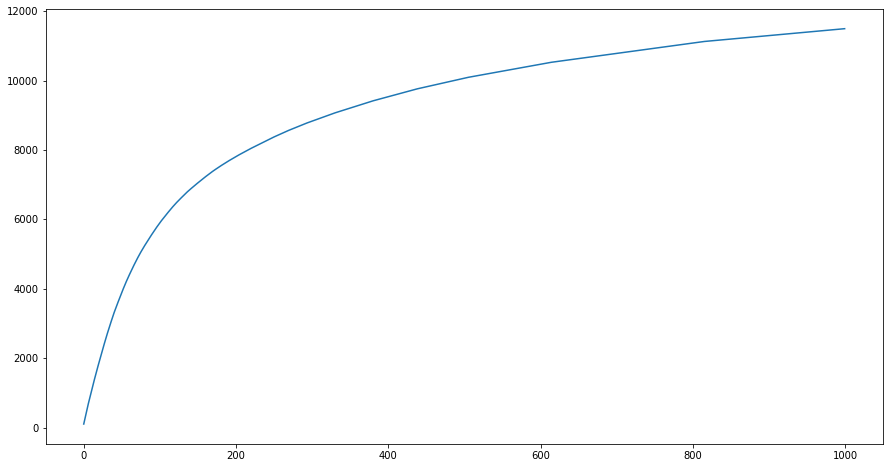

In [34]:
plt.figure(figsize=(15, 8))
plt.plot(df_fashion_skus['Cumulative Lines']);

That looks OK. This list of 1000 SKUs corresponds to a typical order profile. In a 3-shift operation that would lead to a capacity of 550 to 650 order lines/ h.

#### 4. Adding random order quantity for each order line

In [36]:
def order_generator(num_days, avg_orders_per_day, avg_lines_order, order_std, min_order_size):
    
    lst_dates = pd.date_range(datetime.today(), periods=num_days).date.tolist()
    df_ord = pd.DataFrame(np.array([
        [1, 2, 3, 4],
        [4, 5, 6, 7],
        [7, 8, 9, 10]
        ]), columns=['Date', 'Order ID', 'SKU', 'QTY'])

    for day in lst_dates:
        order_count = np.round(abs(np.random.normal(
            loc=avg_orders_per_day,
            scale=50,
            size=1))).astype(int)

        #for ord in order_count:

            


    # Need to continue here

    return pd.DataFrame.from_dict(dict_dates).transpose().rename(columns={0: 'Orders per day'})


In [37]:
def order_generator(orders_per_day, avg_lines_order, order_std, min_order_size):
    
    return np.round(abs(np.random.normal(loc=avg_lines_order, scale=order_std, size=orders_per_day))) + min_order_size

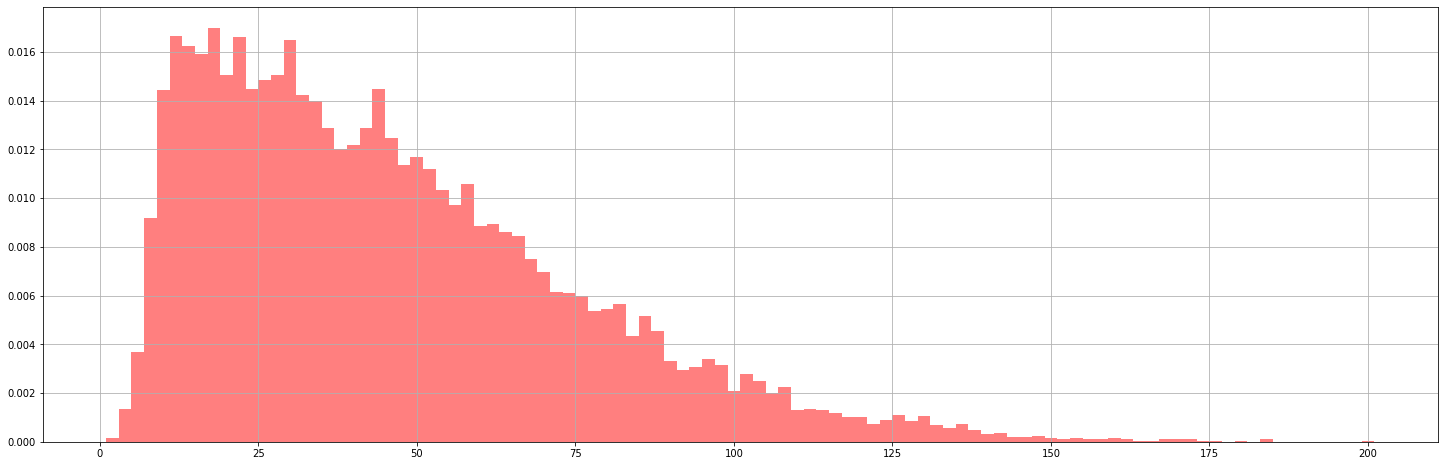

In [38]:
# Approach to develop a skewed dataset with "skewnorm"
n_orders = 10000
max_order_size = 200
skewness = 20   # Negative = left skewed, positive = right skewed

random_orders = skewnorm.rvs(a = skewness, loc=max_order_size, size=n_orders)

random_orders = random_orders - min(random_orders)     # Shift dataset to zero
random_orders = random_orders / max(random_orders)
random_orders = random_orders * max_order_size
random_orders = np.ceil(random_orders) + 1

# Check
plt.figure(figsize=(25, 8))
plt.hist(random_orders, 100, density=True, color='red', alpha=0.5)
plt.grid()

plt.show()

Each record in orders represents one order with an assigned size.

In [39]:
random_orders.min()

1.0